# Project - 3 : Naive Bayes Classifier Model

Problem Statement:
----------------------------
Naïve Bayes Classifier
Model to predict diabetes among Pima Indians
Description – Sample data is available at https://archive.ics.uci.edu/ml/datasets/Adult
The dataset has 9 attributes listed below
1. Number of times pregnant
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. Diastolic blood pressure (mm Hg)
4. Triceps skin fold thickness (mm)
5. 2-Hour serum insulin (mu U/ml)
6. Body mass index (weight in kg/(height in m)^2)
7. Diabetes pedigree function
8. Age (years)
9. Class variable (0 or 1)

# 1. Importing Packages

In [133]:
#importing required libraries

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
%matplotlib inline

from scipy import stats

In [134]:
# For preprocessing the data
from sklearn.preprocessing import Imputer
from sklearn import preprocessing

# To split the dataset into train and test datasets
#from sklearn.cross_validation import train_test_split

from sklearn.model_selection import train_test_split

# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB

# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score

# 2. Importing Dataset

In [135]:
PI_diabetes_ds = pd.read_csv("pima-indians-diabetes-1.csv")

In [136]:
PI_diabetes_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Preg     768 non-null int64
Plas     768 non-null int64
Pres     768 non-null int64
skin     768 non-null int64
test     768 non-null int64
mass     768 non-null float64
pedi     768 non-null float64
age      768 non-null int64
class    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [137]:
PI_diabetes_ds.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [138]:
PI_diabetes_ds.tail()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [139]:
#total number of rows in df
len(PI_diabetes_ds)

768

# 3. Descriptive Statistics and EDA

In [140]:
PI_diabetes_ds.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Plas,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
Pres,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skin,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
test,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
mass,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


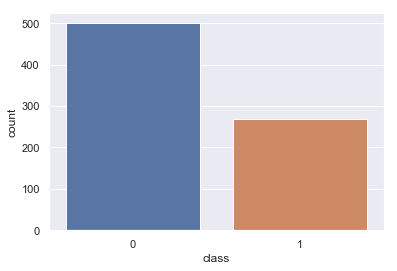

In [141]:
#Count plot for validating the target variable data.
sns.countplot(PI_diabetes_ds["class"])

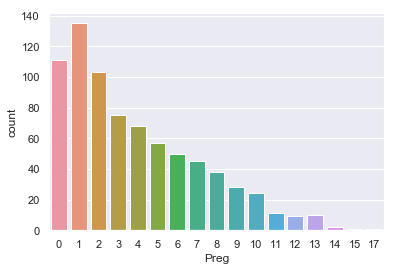

In [142]:
sns.countplot(PI_diabetes_ds["Preg"])

# 4. Data Cleanup Activity

In [143]:
# Handling missing data
# Test whether there is any null value in our dataset or not. We can do this using isnull() method.
PI_diabetes_ds.isnull().sum()

Preg     0
Plas     0
Pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [144]:
pd.value_counts(PI_diabetes_ds['class'].values, sort=False)

0    500
1    268
dtype: int64

In [145]:
#outlier analysis


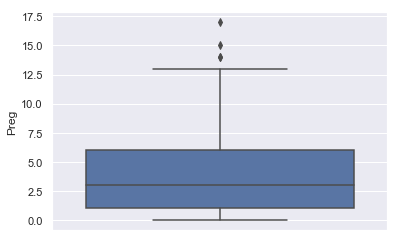

In [146]:
sns.boxplot(y="Preg" , data=PI_diabetes_ds)

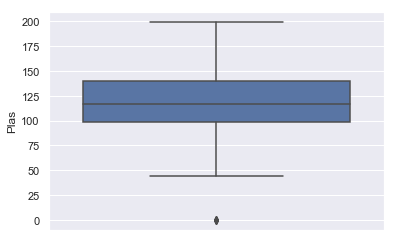

In [147]:
sns.boxplot(y="Plas" , data=PI_diabetes_ds)

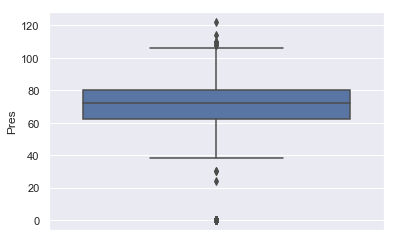

In [148]:
sns.boxplot(y="Pres" , data=PI_diabetes_ds)

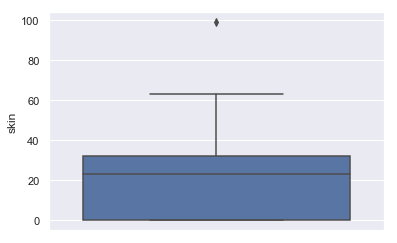

In [149]:
sns.boxplot(y="skin" , data=PI_diabetes_ds)

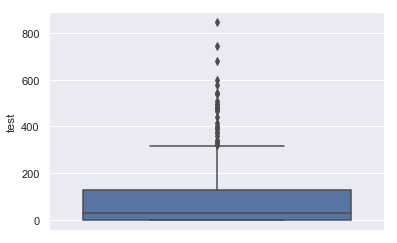

In [150]:
sns.boxplot(y="test" , data=PI_diabetes_ds)

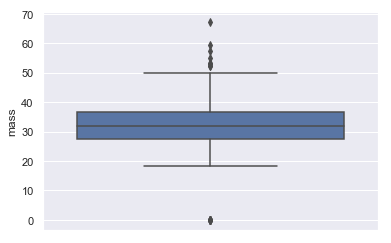

In [151]:
sns.boxplot(y="mass" , data=PI_diabetes_ds)

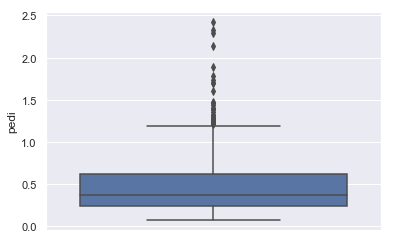

In [152]:
sns.boxplot(y="pedi" , data=PI_diabetes_ds)

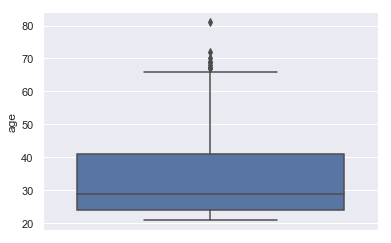

In [153]:
sns.boxplot(y="age" , data=PI_diabetes_ds)

In [154]:
PI_diabetes_ds.describe()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [155]:
PI_diabetes_ds.shape

(768, 9)

In [156]:
#handling outlier data
Q1 = PI_diabetes_ds.quantile(0.25)
Q3 = PI_diabetes_ds.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Preg       5.0000
Plas      41.2500
Pres      18.0000
skin      32.0000
test     127.2500
mass       9.3000
pedi       0.3825
age       17.0000
class      1.0000
dtype: float64


In [157]:
#usind previously calculated IQR score to filter out the outliers by keeping only valid values and removing outlier data

diabetes_df = PI_diabetes_ds[~((PI_diabetes_ds < (Q1 - 1.5 * IQR)) |(PI_diabetes_ds > (Q3 + 1.5 * IQR))).any(axis=1)]
diabetes_df.shape

(639, 9)

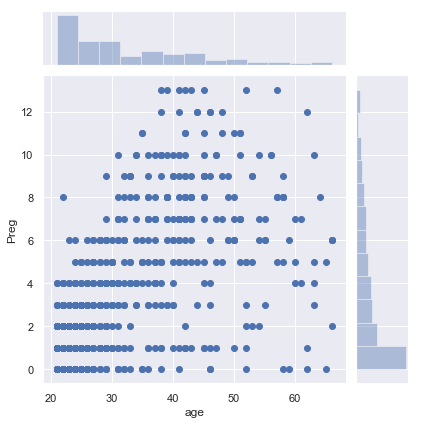

In [158]:
#byvariate analysis age and pregnancies.

sns.jointplot(diabetes_df['age'],diabetes_df['Preg'])

plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000160EE292908>,
      dtype=object)

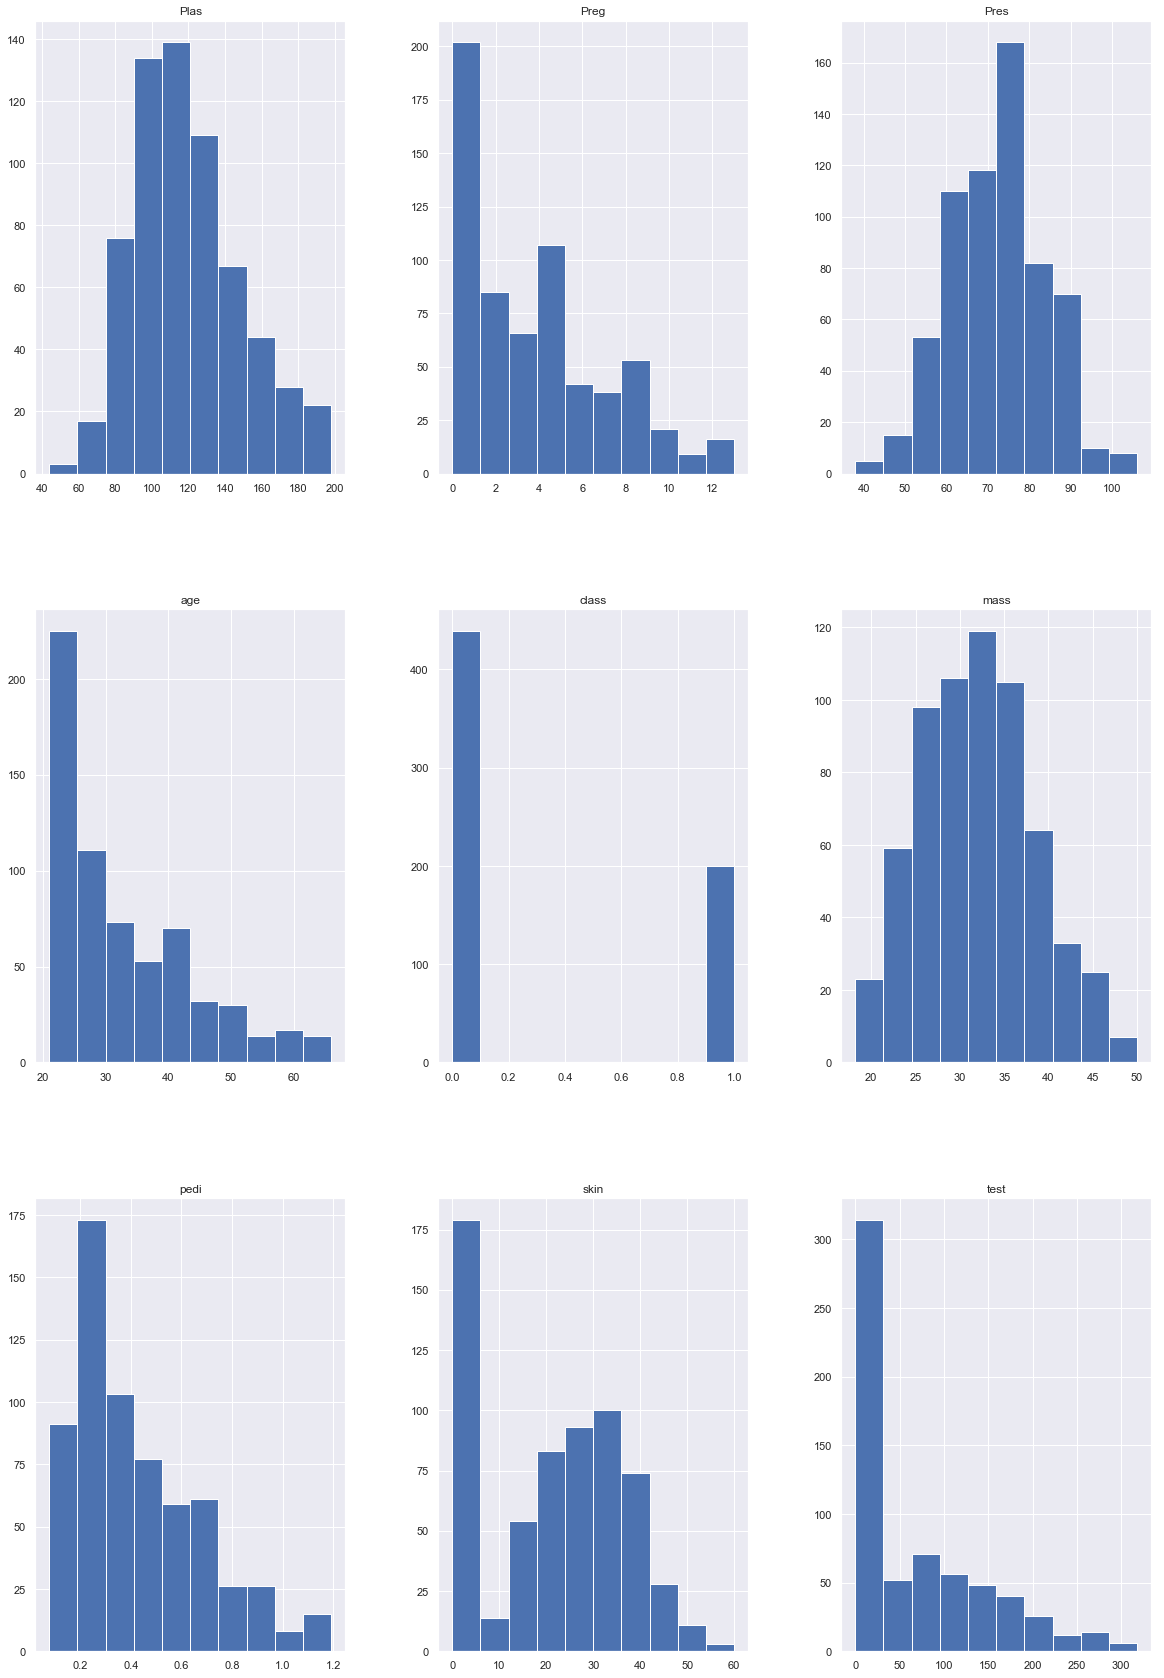

In [159]:
#univariate analysis or data distribution analysis on all the columns.
diabetes_df.hist(figsize=(20,30))

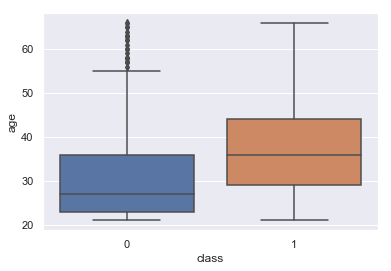

In [160]:
#multivariate analysis
sns.boxplot(x="class", y="age" , data=diabetes_df)

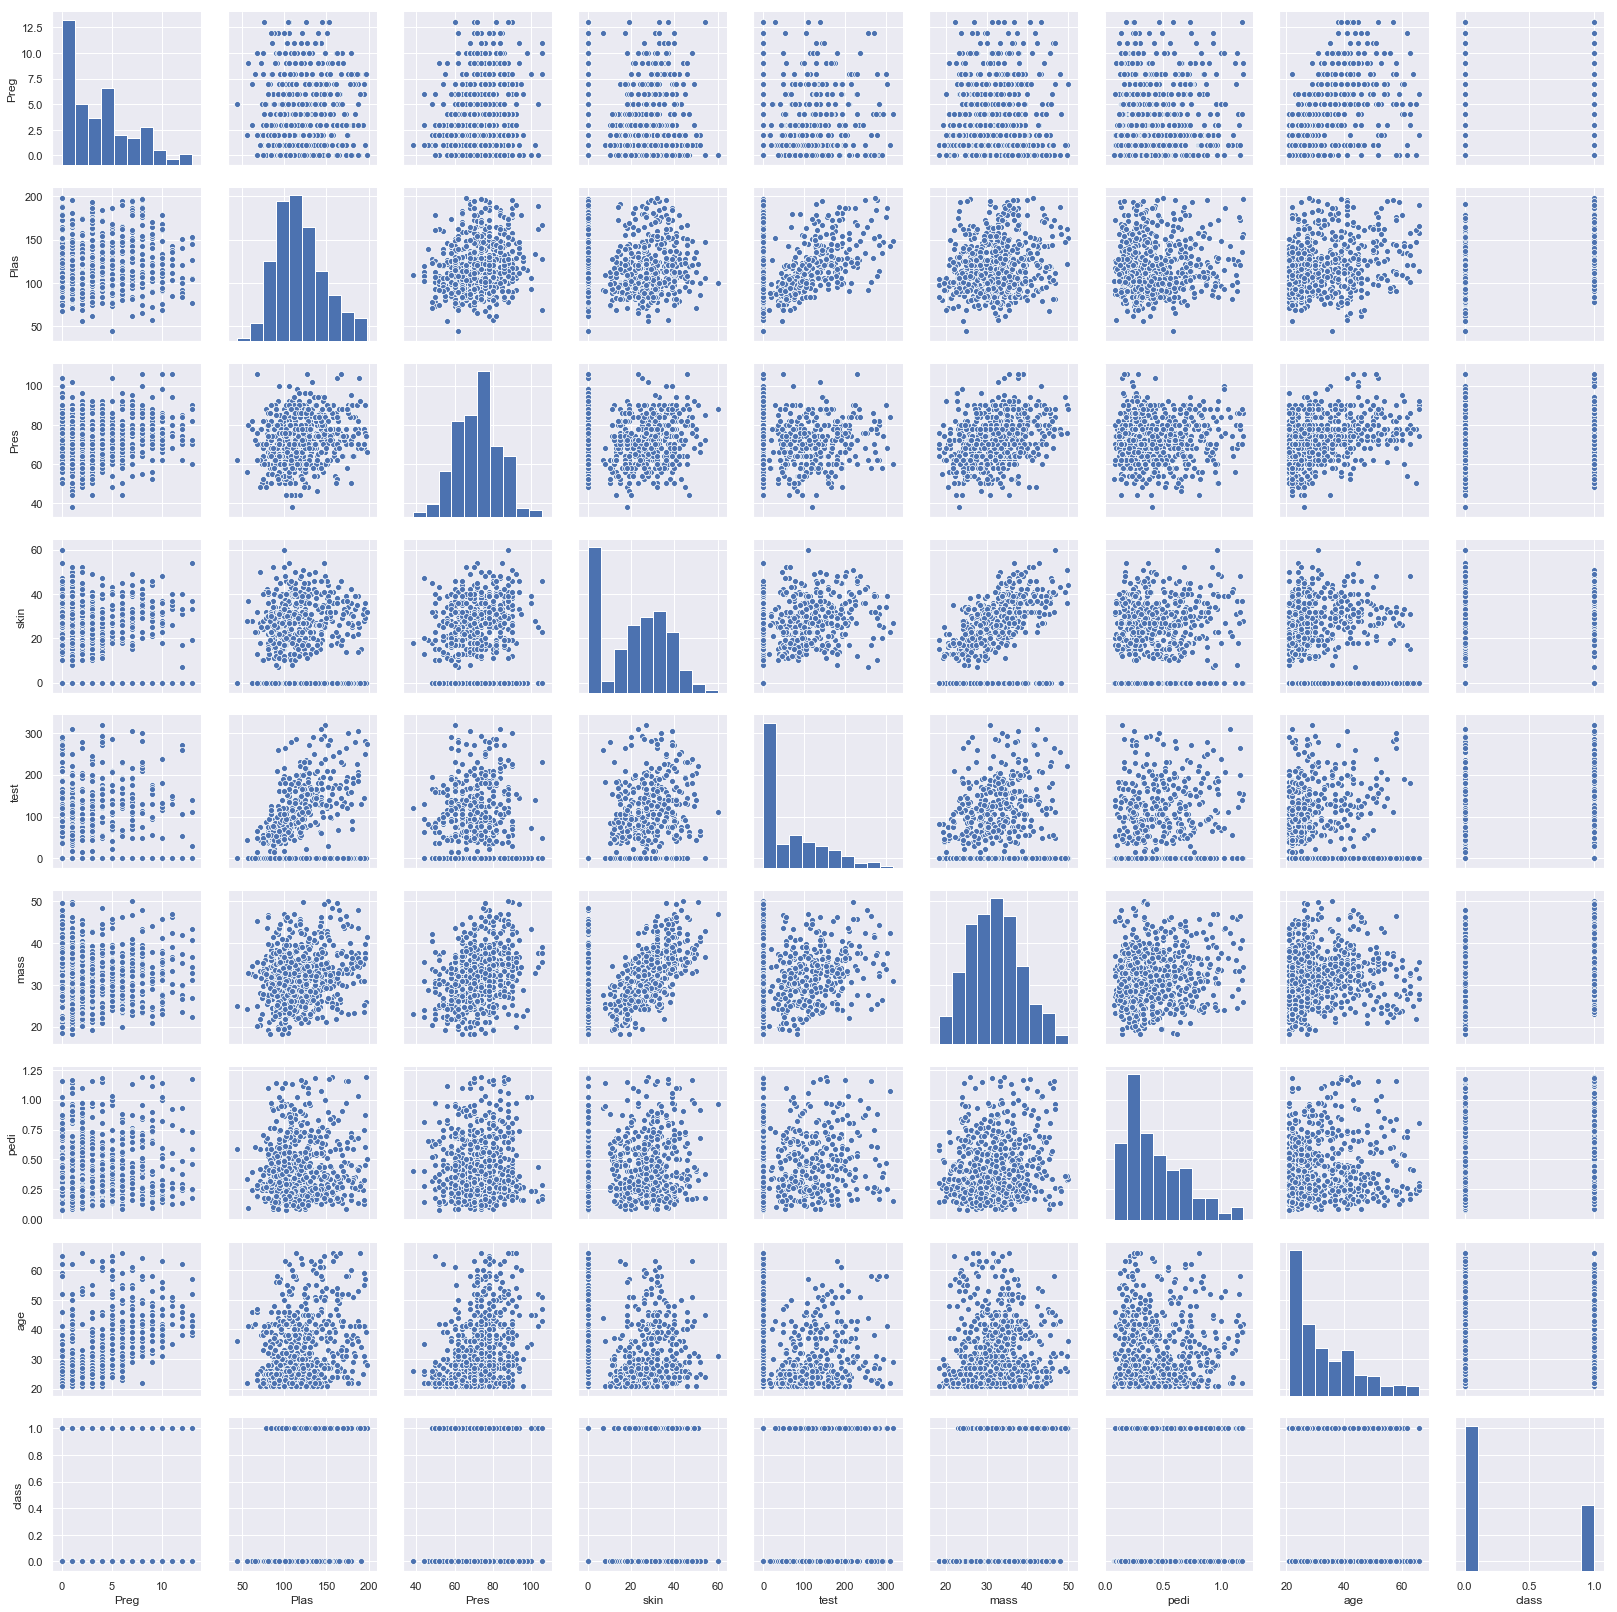

In [161]:
#Analyzing the co-relation between variables using pair plot
sns.pairplot(diabetes_df)

# 5. Data Preparation

In [162]:
# Arrange data into independent variables and dependent variables
X = diabetes_df.values[:,1:8]  ## Features
y = diabetes_df.values[:,8]  ## Target

In [163]:
# splitting X and y into training and testing sets 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1) 

# 6. Model Building

In [164]:
# training the model on training set 
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [165]:
# making predictions on the testing set 
y_pred = gnb.predict(X_test) 

In [166]:
# comparing actual response values (y_test) with predicted response values (y_pred) 
from sklearn import metrics 
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)


Gaussian Naive Bayes model accuracy(in %): 79.6875


# 7. Model Evaluation

In [167]:
print(metrics.confusion_matrix(y_test, y_pred))

[[163  18]
 [ 34  41]]


In [168]:
# Recall (ND-0) 
print(163 / float(163 + 18))
# Recall (D-1)
print(41 / float(41 + 34))

0.9005524861878453
0.5466666666666666


In [169]:
# Precession (ND -0)
print (163 / float(163 + 34))
# Precession (D -1)
print (41 / float(41 + 18))

0.8274111675126904
0.6949152542372882


As per the analysis identified insights as follows

1. Almost ND (0), most of the data not having diabetes in model correctly identified as such, with more than 80 to 90% recall and precession

2. Given data classification 90% likely to be correct, since only 10% is false positive for lable 0 or Non Diabetes.

3. In this negative precession is 70% likely to be correct as per this 30 % going to be false positive.


#Reference:

https://www.geeksforgeeks.org/naive-bayes-classifiers/
https://towardsdatascience.com/naive-bayes-classifier-81d512f50a7c
https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/
https://www.datacamp.com/community/tutorials/naive-bayes-scikit-learn
https://jakevdp.github.io/PythonDataScienceHandbook/05.05-naive-bayes.html